## Classification using KNN

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
target = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=4, stratify=target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier(algorithm='brute', n_neighbors=3)
clf.fit(X_train, y_train)
print(f'Train set accuracy: {accuracy_score(y_train, clf.predict(X_train)):.2f}')    
print(f'Test set accuracy : {accuracy_score(y_test, clf.predict(X_test)):.2f}')

Train set accuracy: 0.98
Test set accuracy : 0.95


In [4]:
import numpy as np
kvalues = np.arange(1, 12, 2)
kvalues

array([ 1,  3,  5,  7,  9, 11])

In [5]:
scores = {}
kvalues = np.arange(1, 12, 2)
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    clf.fit(X_train, y_train)
    scores[k] = {
        'model' : clf, 
        'test_accuracy' : accuracy_score(y_test, clf.predict(X_test)),
        'train_accuracy' : accuracy_score(y_train, clf.predict(X_train))         
    }

In [6]:
for k_value in scores:
    print(k_value, scores[k_value]['test_accuracy'])

1 0.9468085106382979
3 0.9521276595744681
5 0.9574468085106383
7 0.9574468085106383
9 0.9574468085106383
11 0.9574468085106383


### graph

In [7]:
x = list(scores.keys())
y = list(map(lambda k_value: scores[k_value]['test_accuracy'], scores))

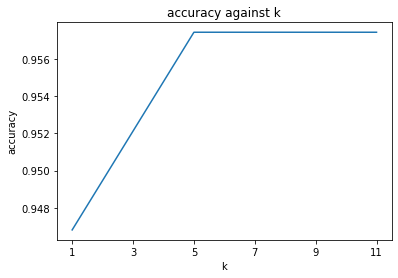

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, y)
plt.title("accuracy against k")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.xticks(kvalues)
plt.show()

### Using Kneighbours

In [9]:
scores

{1: {'model': KNeighborsClassifier(algorithm='brute', n_neighbors=1),
  'test_accuracy': 0.9468085106382979,
  'train_accuracy': 1.0},
 3: {'model': KNeighborsClassifier(algorithm='brute', n_neighbors=3),
  'test_accuracy': 0.9521276595744681,
  'train_accuracy': 0.9816272965879265},
 5: {'model': KNeighborsClassifier(algorithm='brute'),
  'test_accuracy': 0.9574468085106383,
  'train_accuracy': 0.9763779527559056},
 7: {'model': KNeighborsClassifier(algorithm='brute', n_neighbors=7),
  'test_accuracy': 0.9574468085106383,
  'train_accuracy': 0.979002624671916},
 9: {'model': KNeighborsClassifier(algorithm='brute', n_neighbors=9),
  'test_accuracy': 0.9574468085106383,
  'train_accuracy': 0.973753280839895},
 11: {'model': KNeighborsClassifier(algorithm='brute', n_neighbors=11),
  'test_accuracy': 0.9574468085106383,
  'train_accuracy': 0.973753280839895}}

In [10]:
model = scores[3]['model']
model

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [11]:
_dist, _ind = model.kneighbors(X_train[0].reshape(1, -1))
print("distances:", _dist)
print("indexes:  ", _ind)

distances: [[0.         2.77970139 2.79352708]]
indexes:   [[  0 218  96]]


### Other Parameters ....
With sklearn kneighbors classifier, can use a number of parameters:

weights = ['uniform', 'distance'] 

algorithm = ['auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’]

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
